In [63]:
energy = read.table("../data/hcx_residuals_energy_after_event.txt")
# energy_res = energy$V2
energy_res = energy$V1

In [64]:
# standardized_residual_Finance.xlsx
library("readxl")

finance = read_excel("../data/standardized_residual_Finance.xlsx")
finance_res = finance$V1

In [65]:
library(VineCopula)
library(rugarch)
library(fGarch)

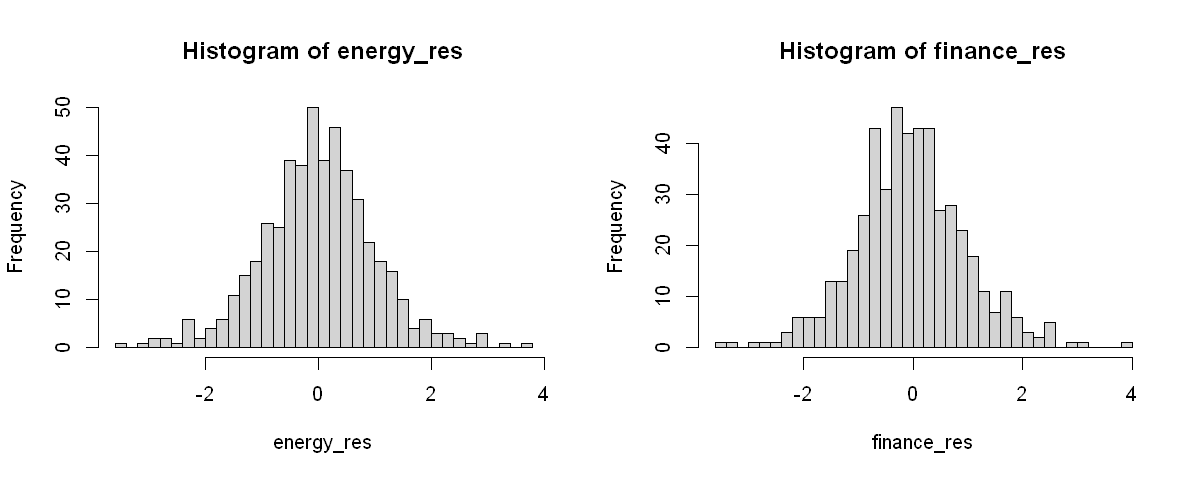

In [66]:
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = hist(energy_res, breaks = 40)
p2 = hist(finance_res, breaks = 40)
par(mfrow = c(1, 1)) # return to the default

In [67]:
length(finance_res)
length(energy_res)

[1] 490

[1] 490

In [69]:
library(readxl)
data <- read.csv("../data/恒生综合指数-金融业历史数据.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
data$date <- as.Date(data$date)
data$close <- as.numeric(gsub(",", "", data$close))
sorted_index <- order(data$date)
data <- data[sorted_index, ]

# Finance_Index_After_Event<- na.omit(data)
#Simple Return to Log Return
close_prices=data$close
log_return=diff(log(close_prices))


library(rugarch)
spec8<-ugarchspec(variance.model=list(model="gjrGARCH",garchOrder=c(1,1)),mean.model=list(armaOrder=c(0,0),include.mean=FALSE),distribution.model="std"
                    ,fixed=c(NA,0,NA,NA,NA))
m8<-ugarchfit(spec=spec8,data=log_return)
print(m8)

#Model Checking
financial_residuals<-residuals(m8,standardize=TRUE)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: gjrGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000016    0.000003  4.738449 0.000002
alpha1  0.000000    0.016871  0.000025 0.999980
beta1   0.850374    0.022069 38.532481 0.000000
gamma1  0.129332    0.043088  3.001584 0.002686
shape   8.809450    2.915466  3.021626 0.002514

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
omega   0.000016    0.000006  2.928974 0.003401
alpha1  0.000000    0.019388  0.000022 0.999982
beta1   0.850374    0.026833 31.691173 0.000000
gamma1  0.129332    0.044615  2.898819 0.003746
shape   8.809450    2.876087  3.062998 0.002191

LogLikelihood : 1511.485 

Information Criteria
------------------------------------
   

In [70]:
coef(m8)

omega       alpha1        beta1       gamma1        shape 
1.621902e-05 4.260181e-07 8.503743e-01 1.293322e-01 8.809450e+00

In [35]:
# financial_residuals

In [36]:
# finance_res

In [49]:
library(readxl)
data <- read.csv("../data/恒生综合指数-能源业历史数据.csv", header = TRUE, col.names = c("date", "close", "open", "high", "low", "volume", "variation"))
data$date <- as.Date(data$date)
data$close <- as.numeric(gsub(",", "", data$close))
sorted_index <- order(data$date)
data <- data[sorted_index, ]

# Finance_Index_After_Event<- na.omit(data)
#Simple Return to Log Return
close_prices=data$close
log_return=diff(log(close_prices))


library(rugarch)

spec_fi=ugarchspec(variance.model = list(model = "fiGARCH", garchOrder = c(1,1)),mean.model = list(armaOrder = c(2,2), include.mean = F),distribution.model = "std")
setfixed(spec_fi)<-list(omega=0)

model_fi=ugarchfit(spec=spec_fi,data=log_return)
model_fi  ### see output

#Model Checking
energy_residuals<-residuals(model_fi,standardize=T)


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: fiGARCH(1,1)
Mean Model	: ARFIMA(2,0,2)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
ar1    -1.380110    0.016900  -81.6611 0.000000
ar2    -0.949329    0.002504 -379.0993 0.000000
ma1     1.407279    0.002875  489.4403 0.000000
ma2     0.998828    0.000819 1220.1836 0.000000
omega   0.000000          NA        NA       NA
alpha1  0.088262    0.032712    2.6981 0.006973
beta1   0.982124    0.000422 2329.4079 0.000000
delta   0.999999    0.021690   46.1043 0.000000
shape   7.013006    1.891189    3.7083 0.000209

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
ar1    -1.380110    0.029527  -46.7400 0.000000
ar2    -0.949329    0.004980 -190.6229 0.000000
ma1     1.407279    0.005035  279.5150 0.0

In [37]:
# energy_residuals

In [38]:
# energy_res


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x1
D = 0.016935, p-value = 0.999
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  x2
D = 0.041404, p-value = 0.3704
alternative hypothesis: two-sided


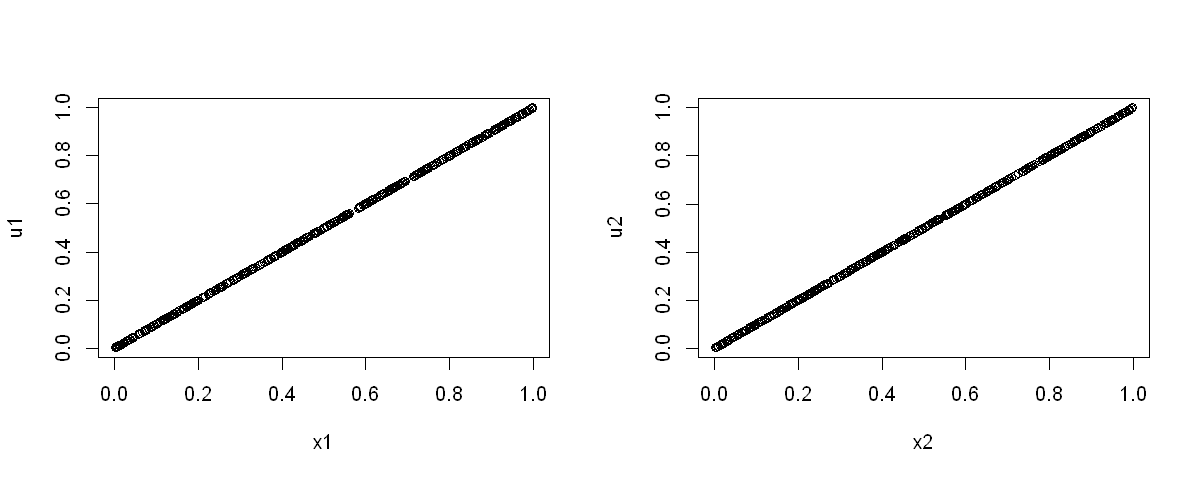

In [71]:
u1<-pstd(energy_res,0,1,7.004194) # from project_ts.html
# u2<-pstd(energy_res,0,1,nu=7.884)#概率积分转换
# 1.55489180343118xi0.939194610023982
u2<-pstd(finance_res,0,1,8.80944996648854) # xue bugei wozijisuande
#psstd(q, mean = 0, sd = 1, nu = 5, xi = 1.5)
#nu为偏t分布的自由度，xi为偏度系数

x1<-as.matrix(u1)
x2<-as.matrix(u2)
ks.test(x1,'punif')
ks.test(x2,'punif')
# #K-S检验,原假设为u1、u2服从均匀分布

# #K-S检验,原假设为u1、u2服从均匀分布
options(repr.plot.width = 10, repr.plot.height = 4)
par(mfrow = c(1, 2))
p1 = qqplot(x1,u1)
p2 = qqplot(x2,u2)
par(mfrow = c(1, 1)) # return to the default


Warning message:
"The dot-dot notation (`..level..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(level)` instead."


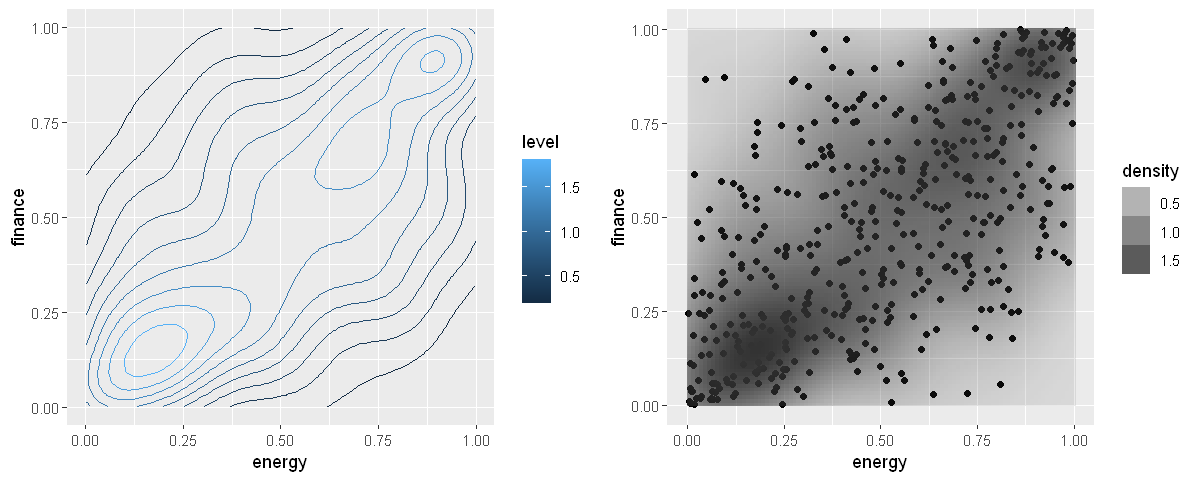

In [72]:
library(ggplot2)
library(gridExtra)

p1 <- ggplot()
# 基函数
p1 = ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 密度图函数：colour设置等高线颜色
  stat_density2d(aes(colour = ..level..))

p2 <- ggplot()
p2 =ggplot(data.frame(energy=u1, finance=u2), aes(x = energy, y = finance)) +
  # 散点图函数
  geom_point() +
  # 密度图函数：alpha设置填充透明度数据为密度，geom设置绘制栅格图
  stat_density2d(aes(alpha = ..density..), geom = "raster", contour = FALSE)

options(repr.plot.width = 10, repr.plot.height = 4)

grid.arrange(p1, p2, ncol = 2, widths = c(0.4, 0.4), heights = c(0.6))

In [73]:
Cop1=BiCopSelect(u1,u2,familyset = c(1,2,3,4,5,6,7,9),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    1
Name:  Gaussian

Parameter(s)
------------
par:  0.62  (SE = 0.02)

Dependence measures
-------------------
Kendall's tau:    0.42 (empirical = 0.44, p value < 0.01)
Upper TD:         0 
Lower TD:         0 

Fit statistics
--------------
logLik:  119.74 
AIC:    -237.49 
BIC:    -233.29 



In [82]:
Cop1=BiCopSelect(u1,u2,familyset = c(9),se =TRUE, rotations = FALSE)
#Copula估计，se表示计算标准误， rotation表示是否考虑旋转Copula，选择标准默认是AIC
#familyset是copula类型集合，主要是选择几种常见的copula族（norm t clayton gumbel frank SJC）
summary(Cop1)#查看估计结果
#对于依赖参数和尾部相关系数、秩相关系数间的转换，可以使用BiCopPar2TailDep和BiCopPar2Tau函数

Family
------ 
No:    9
Name:  BB7

Parameter(s)
------------
par:  1.46  (SE = 0.09)
par2: 0.78  (SE = 0.1)
Dependence measures
-------------------
Kendall's tau:    0.39 (empirical = 0.44, p value < 0.01)
Upper TD:         0.39 
Lower TD:         0.41 

Fit statistics
--------------
logLik:  113.33 
AIC:    -222.67 
BIC:    -214.28 



Warning message:
"package 'psych' was built under R version 4.3.3"

Attaching package: 'psych'


The following objects are masked from 'package:ggplot2':

    %+%, alpha




,energy,finance
energy,1.000000,0.612708
finance,0.612708,1.000000


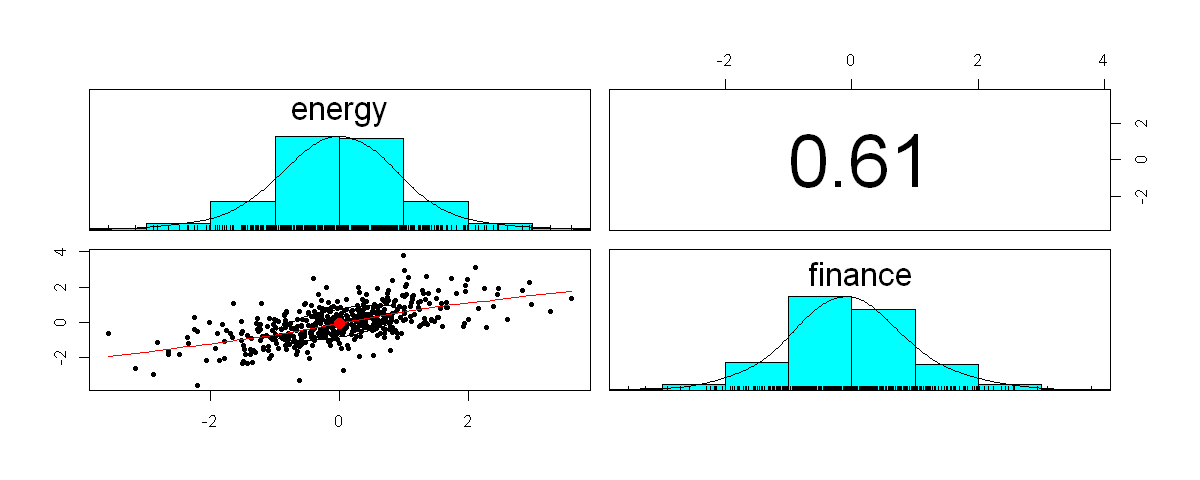

In [83]:
library(psych)
data1 = data.frame(energy=energy_res, finance=finance_res)
cor(data1, method='spearman')
pairs.panels(data1)
# The lower off diagonal draws scatter plots, the diagonal histograms, the upper off diagonal reports the Pearson correlation (with pairwise deletion).

,energy,finance
energy,1.000000,0.612708
finance,0.612708,1.000000


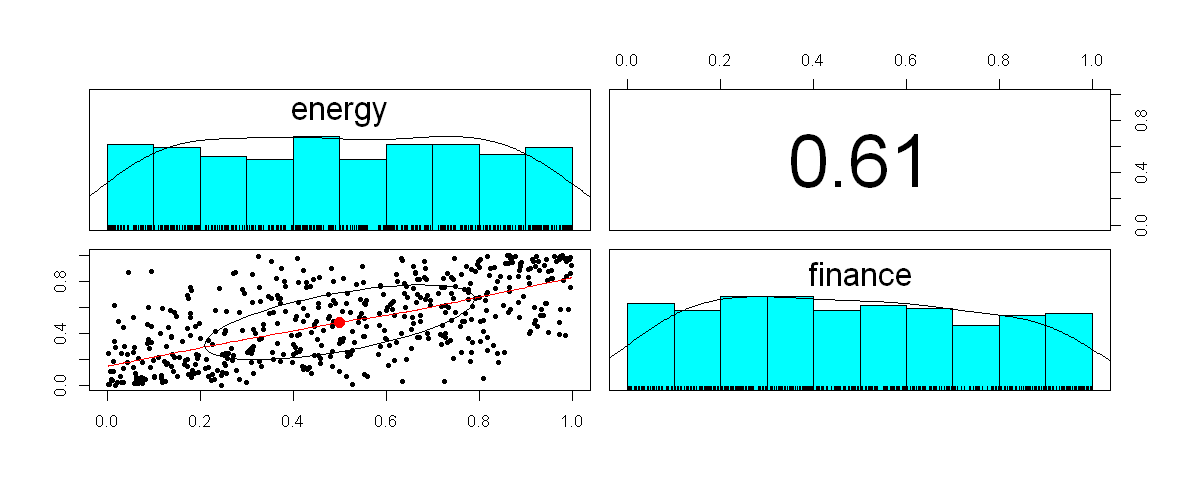

In [84]:
library(psych)
data2 = data.frame(energy=u1, finance=u2)
cor(data2,method='spearman')
pairs.panels(data2)